In [1]:
%load_ext autoreload

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../../analysis')))
from xa.proc.exp import Experiment

x = Experiment(
    name="Asymmetric Run 15m",
    i1='1',
    i2='2',
    i3='3',
    # ... add more iterations here
)

In [3]:
import pandas as pd
import numpy as np

# (un)comment for selecting display precision for floats
pd.options.display.float_format = None # reset
pd.options.display.float_format = np.format_float_positional # dynamic
# pd.options.display.float_format = "{:.2f}".format # fixed

# N = number of elements
# numpy.std is biased, divides by N (population), ddof by default is 0
# pandas.std is unbiased, divides by N-1 (sample), ddof by default is 1

x.stats

count               mean           std bias  \
iter stat                                                                
i1   cpu usage             3948. 4.4639724199594735  5.844836088666747   
     memory usage          3948. 0.7743595349544072  0.851692438460968   
     request latency        900. 243762221.40333334 309348416.46961147   
     request throughput     900. 28.901531507638737 11.915940745741334   
     response time      1407141.  3.949577709839698  6.705203443945492   
i2   cpu usage             2930.  4.092683305802049  4.893178923753146   
     memory usage          2930. 0.7106857194539249  0.740261179545006   
     request latency        900.  49482870.28777778 269153530.29604775   
     request throughput     900.  36.19531962255313  9.533871960819315   
     response time       774624. 1.2527036236113287  5.298299201576989   
i3   cpu usage             3960.  4.321581990151516  5.613723961712103   
     memory usage          3960. 0.7726515353535354 0.8494169556782525   
     request latency        900. 246504768.62111112 309714895.33571225   
     request throughput     900. 28.820119112824404  11.94367653273684   
     response time      1409514.   4.00671076728573  6.726631545241696   

                                std unbias                min  \
iter stat                                                       
i1   cpu usage           5.845576456785325           0.006858   
     memory usage       0.8518003227401341           0.030595   
     request latency    309520420.05058026           1765768.   
     request throughput 11.922566234574505 20.389658079762835   
     response time      6.7052058265095065          0.0000001   
i2   cpu usage           4.894014151022821           0.007437   
     memory usage       0.7403875363231808           0.030559   
     request latency    269303184.75870717           1645714.   
     request throughput  9.539172974273573  5.473735220971974   
     response time      5.2983026214970605          0.0000001   
i3   cpu usage           5.614432899513971            0.00659   
     memory usage       0.8495242256105711           0.031083   
     request latency    309887102.68587446           1556230.   
     request throughput 11.950317443193107 20.415790382380298   
     response time       6.726633931395761          0.0000001   

                                       25%                50%  \
iter stat                                                       
i1   cpu usage                  0.57722675           1.323761   
     memory usage                 0.182133          0.4076705   
     request latency             4766619.5         201799681.   
     request throughput 21.411208776393785 21.935179326706255   
     response time             0.000075301        0.000297205   
i2   cpu usage                  0.55317225          1.3241445   
     memory usage                 0.155695           0.364338   
     request latency            4836821.25          26101406.   
     request throughput 30.685827627063027  33.88755491985094   
     response time           0.00002830175        0.000092202   
i3   cpu usage                  0.53286925          1.3438585   
     memory usage                 0.179596          0.4108285   
     request latency              4840060.        204287917.5   
     request throughput  21.27212216773058  21.80528918079661   
     response time             0.000075802       0.0003007045   

                                      75%               max  \
iter stat                                                     
i1   cpu usage          6.433248000000001         28.484254   
     memory usage                1.097514          5.114197   
     request latency         332648118.75       1497706921.   
     request throughput 33.00043775808892 85.83999300280851   
     response time           15.099158699     311.299731608   
i2   cpu usage                 7.08381825         21.208492   
     memory usage                1.107977          3

In [4]:
x.summary

,mean of means,std of means bias,std of means unbias
cpu usage,4.292745905304346,0.15294343489219836,0.18731668749723338
response time,3.0696640335789187,1.2849967302436942,1.5737931551209259
memory usage,0.7525655965872892,0.029621753236300407,0.03627909035778613
request throughput,31.30565674767209,3.4576735210253515,4.234767911822297
request latency,179916620.1040741,92237384.71887115,112967263.88501036


In [5]:
%autoreload 2
from xa.draw.plot import Figure, Pairwise

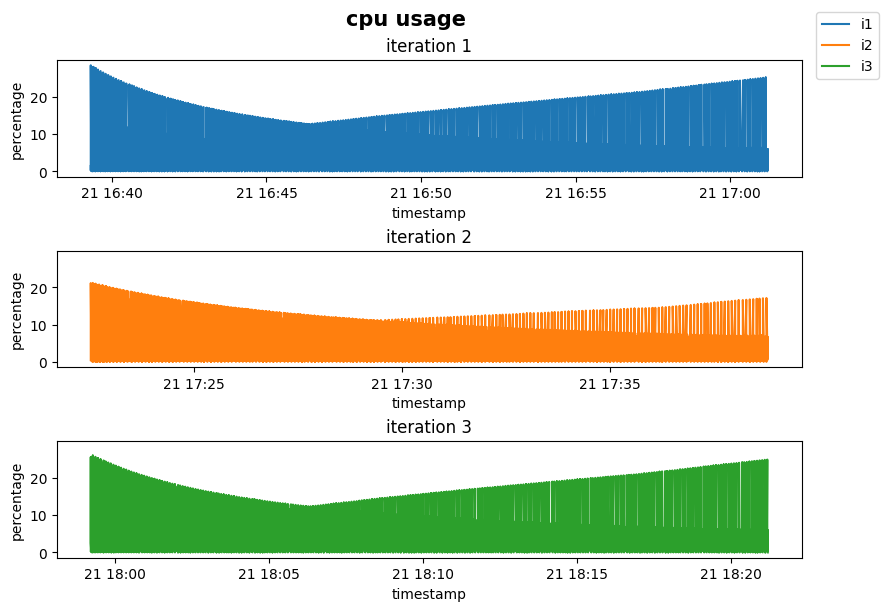

In [6]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.cpu.usage.TS, y=x.i1.metric.cpu.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.cpu.usage.TS, y=x.i2.metric.cpu.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.cpu.usage.TS, y=x.i3.metric.cpu.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='cpu usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

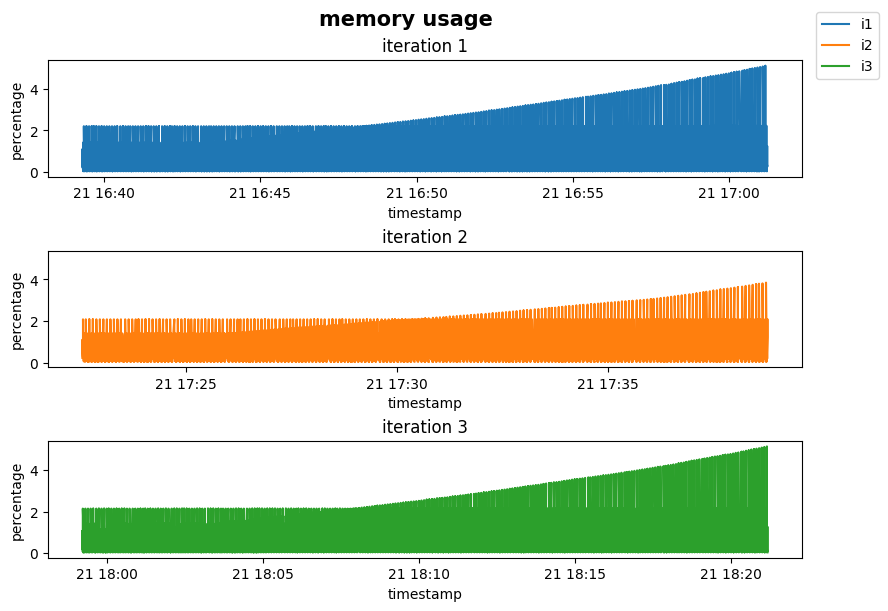

In [7]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.memory.usage.TS, y=x.i1.metric.memory.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.memory.usage.TS, y=x.i2.metric.memory.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.memory.usage.TS, y=x.i3.metric.memory.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='memory usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

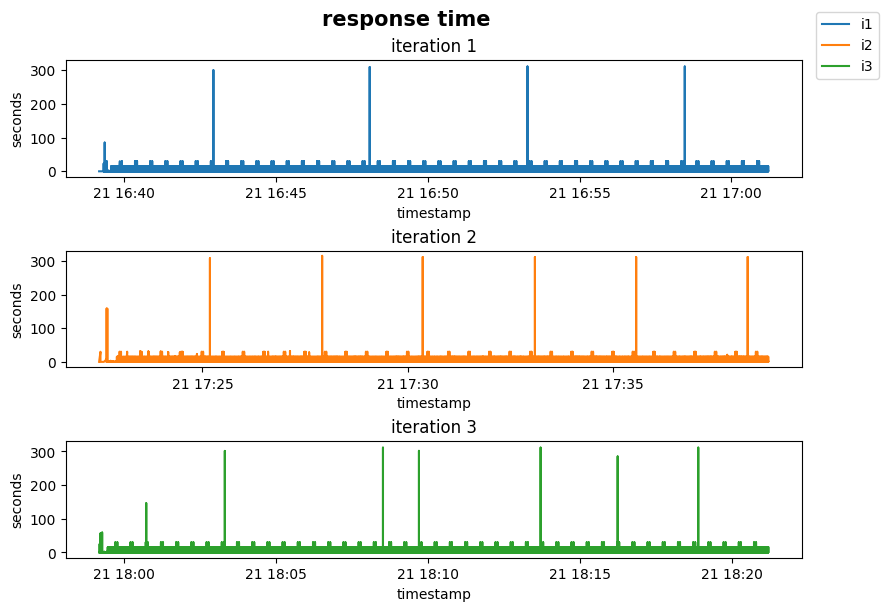

In [8]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.response.time.TS, y=x.i1.metric.response.time.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.response.time.TS, y=x.i2.metric.response.time.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.response.time.TS, y=x.i3.metric.response.time.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='response time', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

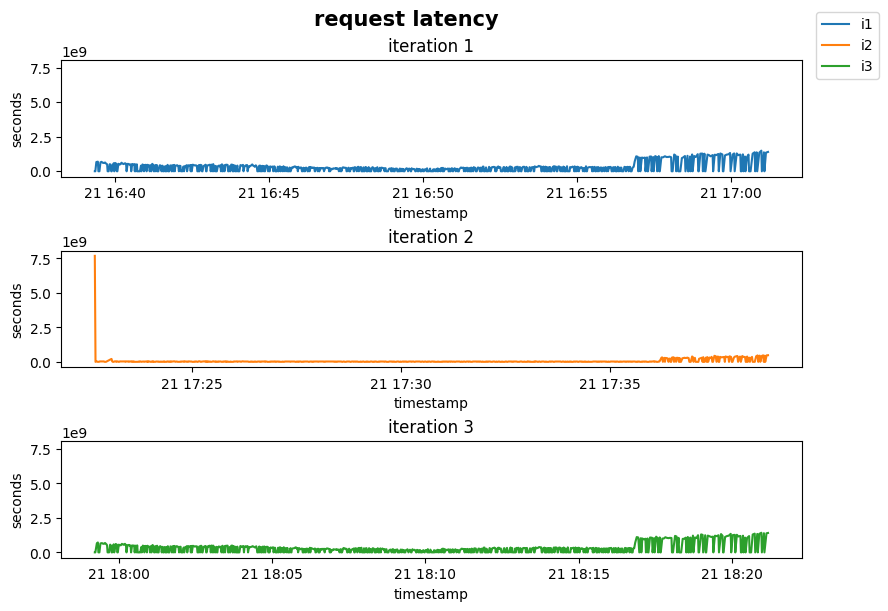

In [9]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.latency.TS, y=x.i1.metric.request.latency.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.request.latency.TS, y=x.i2.metric.request.latency.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.request.latency.TS, y=x.i3.metric.request.latency.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='request latency', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

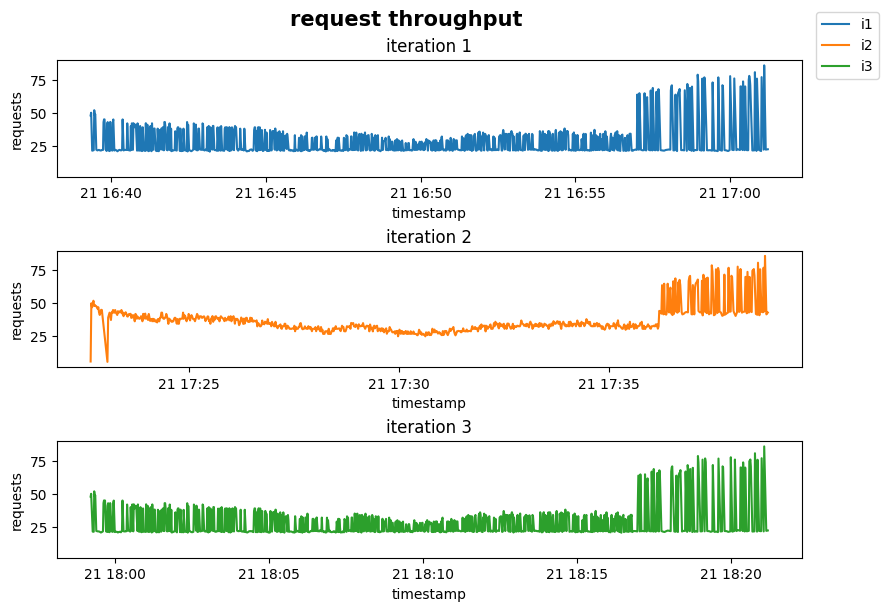

In [10]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.throughput.TS, y=x.i1.metric.request.throughput.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i2.metric.request.throughput.TS, y=x.i2.metric.request.throughput.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i3.metric.request.throughput.TS, y=x.i3.metric.request.throughput.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='requests'),
    title='request throughput', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig